In [1]:
import pandas as pd 

data = pd.read_csv('../data/H114.csv')

data = data.dropna(subset=['doc_clean'])

data

,Unnamed: 0,vote_1,vote_2,vote_3,vote_4,vote_5,vote_7,vote_8,vote_9,vote_10,...,vote_1320,vote_1321,vote_1322,icpsr,dwnom1d,party,legis_name,last_name,speakerid,doc_clean
0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,10713,-0.658,D,"CONYERS, John, Jr.",CONYERS,114119030.0,yield gentlewoman additional minute.\n pleased...
1,1,1.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,13035,-0.514,D,"RANGEL, Charles B.",RANGEL,114120930.0,ask unanimous consent gentleman permit take oa...
3,3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,1.0,1.0,14263,-0.372,D,"NOLAN, Richard Michael",NOLAN,114122310.0,member schakowsky point involvement want know ...
4,4,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,14657,0.638,R,"SENSENBRENNER, Frank James, Jr.",SENSENBRENNER,114121310.0,strong advocacy measure yield balance time.\n ...
7,7,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,14873,-0.382,D,"HOYER, Steny Hamilton",HOYER,114119830.0,thank gentleman yield rise opposition conferen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,428,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,31103,-0.520,D,"PAYNE, Donald, Jr.",PAYNE,114121900.0,like thank work bill congratulation work do fi...
429,429,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,39301,-0.466,D,"CLYBURN, James Enos",CLYBURN,114118960.0,gentleman fact entertain amendment love speak ...
433,433,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,39308,0.496,R,"GOODLATTE, Robert William",GOODLATTE,114119550.0,detain present vote yea ask unanimous consent ...
435,435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,1.0,21560,0.227,R,"DONOVAN, Daniel M., Jr.",DONOVAN,114123440.0,appear bar take oath office follow swear suppo...


In [4]:
import sys
sys.path.append('../IdealPointNN/')
from dataset import IdealPointNNDataset
from ideal_point_model import IdealPointNN

train_data = IdealPointNNDataset(
    data
)
train_data.add_modality(
    modality = 'text',
    df = data,
    vectorizer_args = {
        "max_df": 0.999,
        "min_df": 0.001
    }
)
train_data.add_modality(
    modality = 'vote',
    df = data,
    columns = data.filter(like='vote_').columns
)

train_datasets = [train_data]

print(train_data.modalities)

m = IdealPointNN(
    train_datasets, 
    n_dims=1,
    update_prior=False,
    log_every_n_epochs = 1,
    dropout = 0.2,
    w_prior = 100000,
    w_vote = 1000000,
    batch_size = 32,
    learning_rate=1e-3,
    patience= 5, 
    seed = 42,
    num_epochs= 50
)

['text', 'vote']
Epoch   1	Mean Loss: 1323194.9166667

Epoch   2	Mean Loss: 976640.3958333

Epoch   3	Mean Loss: 818589.0364583

Epoch   4	Mean Loss: 857944.7083333

Epoch   5	Mean Loss: 771106.9010417

Epoch   6	Mean Loss: 668598.4375000

Epoch   7	Mean Loss: 716231.8802083

Epoch   8	Mean Loss: 603575.2552083

Epoch   9	Mean Loss: 783835.5416667

Epoch  10	Mean Loss: 598338.4010417

Epoch  11	Mean Loss: 607927.0937500

Epoch  12	Mean Loss: 632189.3541667

Epoch  13	Mean Loss: 554038.7317708

Epoch  14	Mean Loss: 527374.2500000

Epoch  15	Mean Loss: 546293.0338542

Epoch  16	Mean Loss: 534783.8098958

Epoch  17	Mean Loss: 579804.8932292

Epoch  18	Mean Loss: 535016.4192708

Epoch  19	Mean Loss: 522623.3880208

Epoch  20	Mean Loss: 501033.5182292

Epoch  21	Mean Loss: 505229.6692708

Epoch  22	Mean Loss: 493774.8671875

Epoch  23	Mean Loss: 484754.3489583

Epoch  24	Mean Loss: 490820.5416667

Epoch  25	Mean Loss: 485263.1718750

Epoch  26	Mean Loss: 477384.5911458

Epoch  27	Mean Loss:

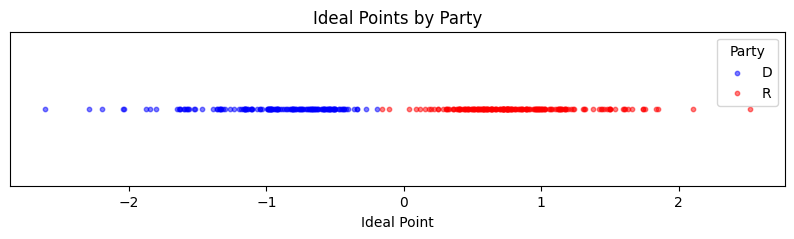

In [5]:
import matplotlib.pyplot as plt

data['ideal_point'] = m.get_ideal_points(train_datasets)

# Define colors for each party
colors = {'R': 'red', 'D': 'blue'}

# Create a scatter plot
plt.figure(figsize=(10, 2))
for party in data['party'].unique():
    subset = data[data['party'] == party]
    plt.scatter(subset['ideal_point'], [1]*len(subset), color=colors[party], label=party, s=10, alpha = 0.5)

# Adding labels and title
plt.yticks([])  # Hide the y-axis
plt.xlabel('Ideal Point')
plt.title('Ideal Points by Party')
plt.legend(title='Party')

# Display the plot
plt.show()

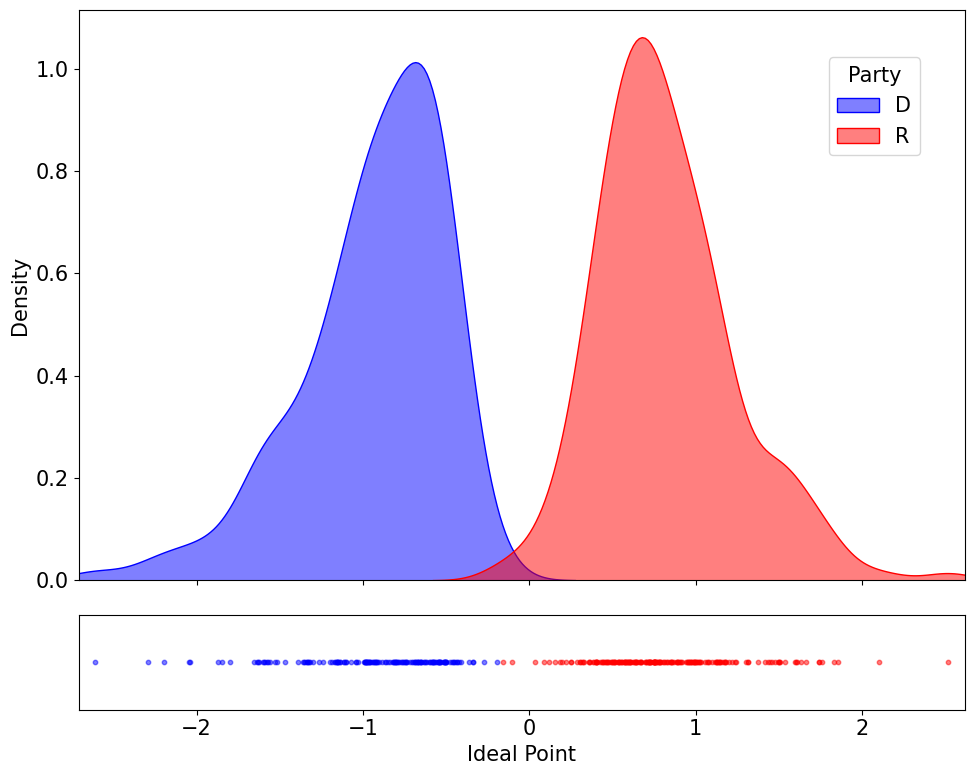

In [8]:
# Set general font size for all labels
plt.rcParams.update({
    'font.size': 15,            # Base font size
    'axes.titlesize': 15,       # Font size for plot titles
    'axes.labelsize': 15,       # Font size for x and y labels
    'xtick.labelsize': 15,      # Font size for x-axis tick labels
    'ytick.labelsize': 15,      # Font size for y-axis tick labels
    'legend.fontsize': 15,      # Font size for legend
    'figure.titlesize': 16      # Font size for figure title
})


import matplotlib.pyplot as plt
import seaborn as sns

mean_ideal_point = data
#mean_ideal_point['ideal_point'] = -1 * mean_ideal_point['ideal_point']

# Define colors for each party
colors = {'R': 'red', 'D': 'blue'}

# Set up the figure with two subplots: one for the density plot and one for the scatter plot
fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 0.5]}, sharex=True)

# Density plot (top subplot)
for party in mean_ideal_point['party'].unique():
    subset = mean_ideal_point[mean_ideal_point['party'] == party]
    sns.kdeplot(subset['ideal_point'], fill=True, color=colors[party], label=party, alpha=0.5, ax=axes[0])

# Customize density plot
axes[0].set_xlabel('')  # Remove redundant x-axis label
axes[0].set_ylabel('Density')

# Scatter plot (bottom subplot)
for party in mean_ideal_point['party'].unique():
    subset = mean_ideal_point[mean_ideal_point['party'] == party]
    axes[1].scatter(subset['ideal_point'], [1] * len(subset), color=colors[party], s=10, alpha=0.5)

# Customize scatter plot
axes[1].set_yticks([])  # Hide the y-axis ticks
axes[1].set_xlabel('Ideal Point')

# Set x-axis limits to be shared by both subplots
x_limits = [mean_ideal_point['ideal_point'].min()-0.1, mean_ideal_point['ideal_point'].max()+0.1]
axes[0].set_xlim(x_limits)
axes[1].set_xlim(x_limits)

# Add a unified legend in the top subplot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Party', loc=(0.85, 0.8))

# Adjust layout for a cleaner look
plt.tight_layout()
plt.savefig('congress_114_votes_and_speeches.pdf')
plt.show()


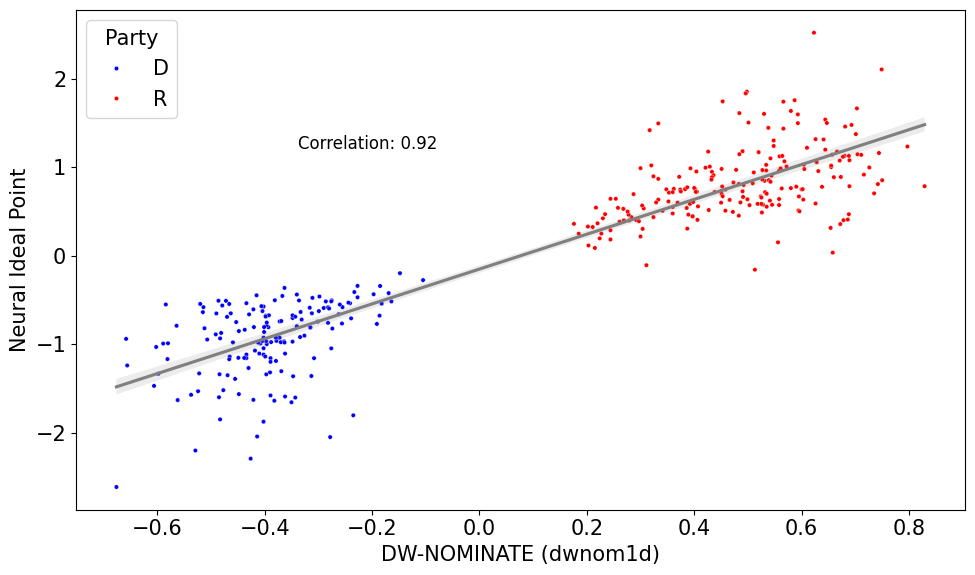

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Define colors for each party
colors = {'R': 'red', 'D': 'blue'}

# Calculate correlation coefficient
correlation, _ = pearsonr(mean_ideal_point['dwnom1d'], mean_ideal_point['ideal_point'])

# Scatter plot with linear fit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_ideal_point, x='dwnom1d', y='ideal_point', hue='party', palette=colors, alpha=1, s=10)
sns.regplot(data=mean_ideal_point, x='dwnom1d', y='ideal_point', scatter=False, color='grey', line_kws={"label": "Linear Fit"})

# Display correlation coefficient
plt.text(0.25, 0.75, f'Correlation: {correlation:.2f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)

# Customize plot
plt.xlabel('DW-NOMINATE (dwnom1d)')
plt.ylabel('Neural Ideal Point')
plt.legend(title='Party')
plt.tight_layout()
plt.savefig('congress_114_votes_and_speeches_vs_dwnom1d.pdf')
plt.show()


In [10]:
import torch
import torch.nn.functional as F

topK = 100

m.Decoders['text'].eval()
with torch.no_grad():
    topic_words = {}

    # Set idxes for the two cases
    idxes_pos = torch.eye(m.n_dims).to(m.device)
    idxes_neg = torch.eye(m.n_dims).to(m.device)

    idxes_pos[:, 0] = 2
    idxes_neg[:, 0] = -2

    # Get word distributions for both idxes
    word_dist_pos = m.Decoders['text'](idxes_pos)
    word_dist_neg = m.Decoders['text'](idxes_neg)

    # Apply softmax to each to get probabilities
    word_dist_pos = F.softmax(word_dist_pos, dim=1)
    word_dist_neg = F.softmax(word_dist_neg, dim=1)

    # Get top K words directly for each setting
    _, indices_pos = torch.topk(word_dist_pos, topK, dim=1)
    _, indices_neg = torch.topk(word_dist_neg, topK, dim=1)

    # Get the most distinctive words for idxes_pos (Dim 2) and idxes_neg (Dim -2)
    # by calculating the difference tensors
    diff_tensor_pos = word_dist_pos - word_dist_neg  # Distinctive for Dim 2
    diff_tensor_neg = word_dist_neg - word_dist_pos  # Distinctive for Dim -2

    # Get top K distinctive words based on difference tensors
    _, indices_distinct_pos = torch.topk(diff_tensor_pos, topK, dim=1)
    _, indices_distinct_neg = torch.topk(diff_tensor_neg, topK, dim=1)

    # Map indices to words

    topic_words["Distinctive Republican Words"] = [
        train_data.data['text']["id2token"][idx.item()] for idx in indices_distinct_pos[0]
    ]
    topic_words["Distinctive Democrat Words"] = [
        train_data.data['text']["id2token"][idx.item()] for idx in indices_distinct_neg[0]
    ]

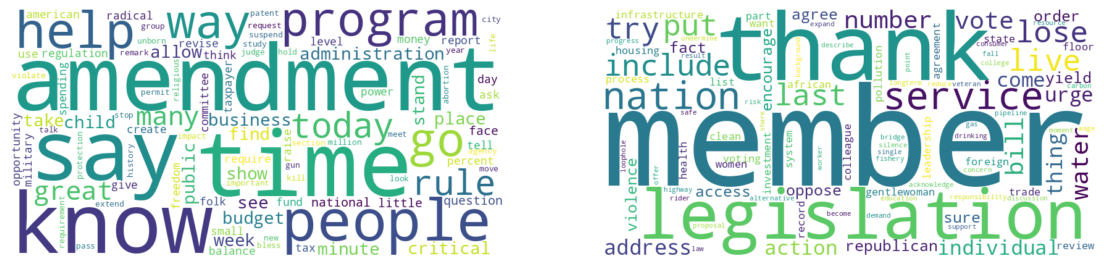

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample data for the wordclouds: combining top and distinctive words per dimension
words_dim_2 = " ".join(topic_words["Distinctive Republican Words"])
words_dim_neg_2 = " ".join(topic_words["Distinctive Democrat Words"])

# Generate wordclouds
wordcloud_dim_2 = WordCloud(width=800, height=400, background_color='white').generate(words_dim_2)
wordcloud_dim_neg_2 = WordCloud(width=800, height=400, background_color='white').generate(words_dim_neg_2)

# Display wordclouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_dim_2, interpolation="bilinear")
plt.axis("off")
plt.title("")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_dim_neg_2, interpolation="bilinear")
plt.axis("off")
plt.title("")

plt.show()
